## Load necessary libraries

In [2]:
from obspy import read
from obspy.clients.fdsn import Client
client = Client("IRIS")
from obspy import UTCDateTime

import cartopy.crs as ccrs
import cartopy
import matplotlib.pyplot as plt

## Show map of the study site

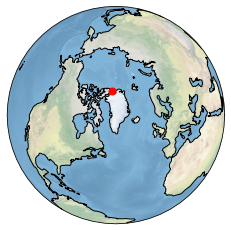

In [29]:
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=-45, central_latitude=70))
ax.stock_img()
ax.coastlines()
ax.plot(-62.35, 82.5033, 'ro', markersize=7, transform=ccrs.Geodetic())

## Zoom to Greenland

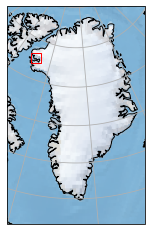

In [40]:
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=-45, central_latitude=90))
ax.stock_img()
ax.coastlines(resolution='50m')
ax.plot(-68.55, 77.69, 'rs', markersize=10, markerfacecolor='none', transform=ccrs.Geodetic())
extent = [-60, -30, 55, 85]
ax.set_extent(extent)
ax.gridlines()

## Watch video of iceberg calving at the site (2017)

In [33]:
from IPython.display import YouTubeVideo
id='n6y4TKJJPeI'
YouTubeVideo(id=id, width=600,height=400)

## Load seismic data from nearby stations

In [67]:
ts=UTCDateTime("2019-07-29T03:40:00")
te=UTCDateTime("2019-07-29T04:00:00")
tt = client.get_waveforms("DK","TULEG","*","HHZ",ts,te)
tt += client.get_waveforms("DK","NEEM","10","BHZ",ts,te)
tt += client.get_waveforms("II","ALE","00","BHZ",ts,te)

tt[0].stats.distance=126000 # Distance to "TULEG", km
tt[1].stats.distance=419000 # Distance to "NEEM", km
tt[2].stats.distance=550000 # Distance to "ALE", km

## Show stations and glacier

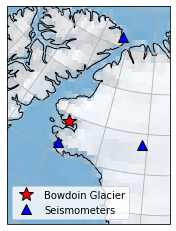

In [70]:
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=-45, central_latitude=90))
ax.stock_img()
ax.coastlines(resolution='50m')
ax.plot(-68.55, 77.69, 'k*', markersize=15, markerfacecolor='r', transform=ccrs.Geodetic())

LON=[-68.82, -62.35, -51.07]
LAT=[76.53, 82.50, 77.44]
ax.plot(LON, LAT, 'k^', markersize=10, markerfacecolor='b', transform=ccrs.Geodetic())

extent = [-74, -45, 73.6, 83.5]
ax.set_extent(extent)
ax.gridlines()
ax.legend(['Bowdoin Glacier','Seismometers'])

from matplotlib_scalebar.scalebar import ScaleBar
scalebar = ScaleBar(1,box_alpha=0)
ax.add_artist(scalebar)

In [68]:
tt.detrend()
tt.filter("bandpass", freqmin=0.02, freqmax=0.04, corners=4, zerophase=True)

3 Trace(s) in Stream:
DK.TULEG..HHZ  | 2019-07-29T03:40:00.000000Z - 2019-07-29T04:00:00.000000Z | 100.0 Hz, 120001 samples
DK.NEEM.10.BHZ | 2019-07-29T03:40:00.000000Z - 2019-07-29T04:00:00.000000Z | 20.0 Hz, 24001 samples
II.ALE.00.BHZ  | 2019-07-29T03:40:00.019538Z - 2019-07-29T03:59:59.969538Z | 20.0 Hz, 24000 samples

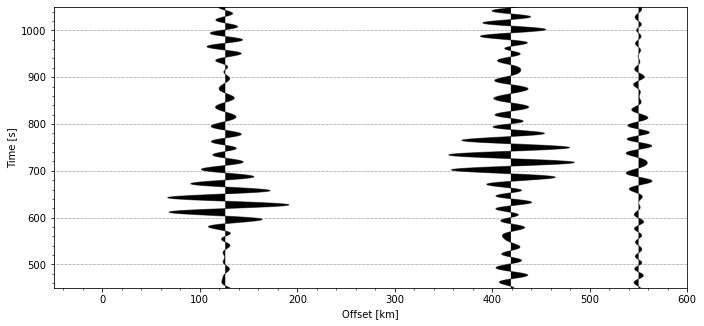

In [69]:
fig = plt.figure(figsize=(10,5))
tt.plot(type='section',
	offset_min=-50000,
	offset_max=600000,
	recordstart=450,
	recordlength=10*60,
	fillcolors=('k','k'),
	norm_method='trace',
	orientation='vertical',
	show=False, fig=fig
	);

ModuleNotFoundError: No module named 'matplotlib_scalebar'